# Hazardous Asteroid Classification

![asteroid](images/asteroid.jpg)

##### By: Jordana Tepper

## Project Description

This project aims to build a model that can classify an asteroid as hazardous to Earth (1) or not hazardous to Earth (0) using predictor variables such as the minimum and maximum diameter of the asteroid, absolute magnitude, minimum orbit intersection distance (MOID), and perihelion distance.

### Definitions:
* **Absolute Magnitude**: The visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle [(NASA)](https://cneos.jpl.nasa.gov/glossary/h.html)   
* **Minimum Orbit Intersection Distance (MOID)**: The distance between the closest points of the osculating orbits of two bodies [(_Monthly Notices of the Royal Astronomical Society_)](https://academic.oup.com/mnras/article/479/3/3288/5039662) 
* **Perihelion Distance**: An orbit’s closest point to the Sun [(NASA)](https://cneos.jpl.nasa.gov/glossary/perihelion.html)

## Data Understanding

In [2]:
# Basic imports
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling 
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

In [3]:
# Loading in the data
df = pd.read_csv('data/asteroid_data/nasa.csv')

In [4]:
# Previewing the data
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
# Looking at information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [6]:
# Looking for missing values
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [7]:
# Looking at various statistics for the numerical columns
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


## Data Preparation

In [8]:
# Dropping the categorical columns
df.drop(columns = ['Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'],
                    inplace = True, axis = 1)

In [9]:
# Labeling the dependent variable on a binary scale
lb = LabelBinarizer()
df['Hazardous'] = lb.fit_transform(df['Hazardous'])

In [10]:
# Previewing the dependent variable
df['Hazardous']

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64

## Data Analysis

## Modeling

I decided to use recall as my primary metric because a false negative (classifying an asteroid as NOT hazardous when it is) is more costly than a false positive (classifying an asteroid as hazardous when it is NOT).

In [11]:
# Splitting the data into test and train data
X = df.drop(columns = 'Hazardous', axis = 1)
y = df['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

### Model 1

In [12]:
# Creating the model 1 pipeline with Logistic Regression
model1_lr = Pipeline([('over', RandomOverSampler(sampling_strategy='not majority', random_state = 42)),
                                ('scaler', StandardScaler()),
                                ('classifier', LogisticRegression(random_state=42))])

In [13]:
# Fitting model 1 on the train data
model1_lr.fit(X_train, y_train)

Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='not majority')),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [14]:
# Calculating the predictions for the test data
y_preds_model_1 = model1_lr.predict(X_test)

In [15]:
# Calculating the recall score for model 1
model1_recall = recall_score(y_test, y_preds_model_1)
print ("Model 1 Recall Score:", model1_recall)

Model 1 Recall Score: 0.9536423841059603


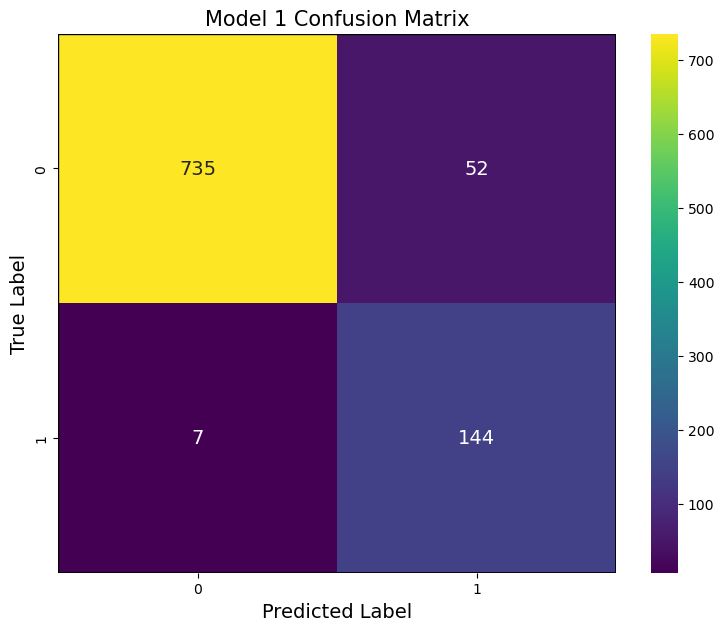

In [16]:
# Visualization of a confusion matrix
conf_mat_best = confusion_matrix(y_test, y_preds_model_1)
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 1 Confusion Matrix', fontdict = {'fontsize': 15})
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

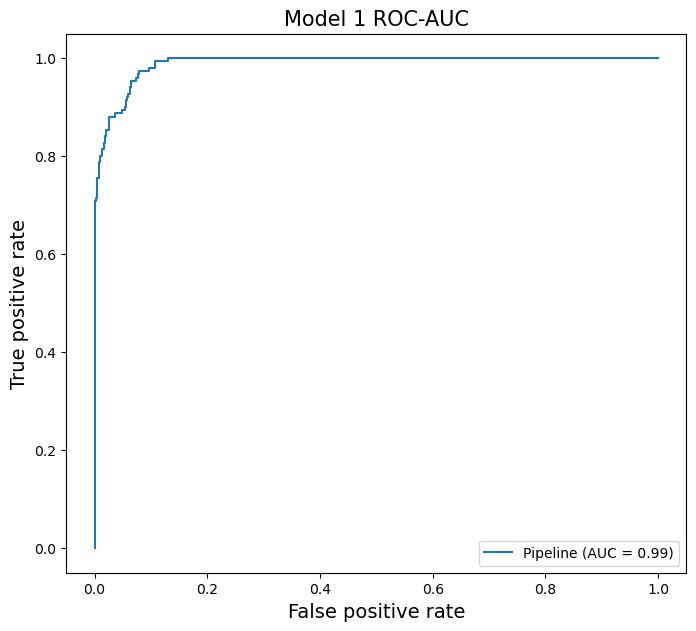

In [17]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (8,7))
plot_roc_curve(model1_lr, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate', size = 14)
ax.set_xlabel('False positive rate', size = 14)
ax.set_title('Model 1 ROC-AUC', fontdict = {'fontsize': 15})
plt.show()

### Model 2

In [18]:
# Calculating y probabilities using our model 1
y_prob = model1_lr.predict_proba(X_test)

In [19]:
# Using roc_curve() to find fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

In [20]:
# Creating a dataframe of fpr, tpr, and thresholds
thresh_df = pd.DataFrame({'threshold': thresholds,
                          'tpr':  tpr, 'fpr': fpr}).iloc[1::, :]

In [21]:
# Adding a column to the DataFrame called J_stat that represents Youden's J-statistic
thresh_df['J_stat'] = thresh_df['tpr'] - thresh_df['fpr']

In [22]:
# Selecting the threshold with highest J-statistic and labeling it the optimal threshold
max_selector = thresh_df.index == thresh_df['J_stat'].idxmax()

optimal_thresh = thresh_df[max_selector]
optimal_thresh

,threshold,tpr,fpr,J_stat
50,0.390403,0.97351,0.07878,0.89473


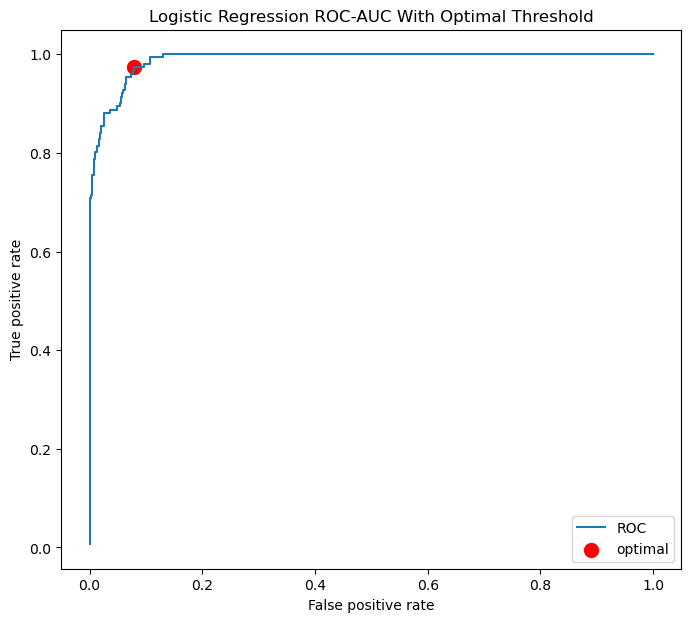

In [23]:
# Creating a visualization to mark the tpr and fpr values at the optimal threshold
fig, ax = plt.subplots(figsize = (8,7))
thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax, label = 'ROC')
optimal_thresh.plot.scatter(x = 'fpr', y = 'tpr', c ='r', s = 100, ax = ax, label = 'optimal' )
# ax.annotate(text = 'AUC = 0.85', xy = (0.8, .05))
# rectangle = plt.Rectangle((0.7781, 0.02), 0.2, 0.08, facecolor='none', edgecolor='black')
# plt.gca().add_patch(rectangle)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Logistic Regression ROC-AUC With Optimal Threshold')
plt.show()

In [24]:
# Calculating y predictions using the optimal threshold
thresh = optimal_thresh['threshold'].values
y_pred_best_threshold = (y_prob[:,1] >= thresh).astype(int)

In [25]:
# Finding the new recall value with the optimal threshold for the test set
model2_recall = recall_score(y_test, y_pred_best_threshold)
model2_recall

print('Model 2 Recall Score:', model2_recall)

Model 2 Recall Score: 0.9735099337748344


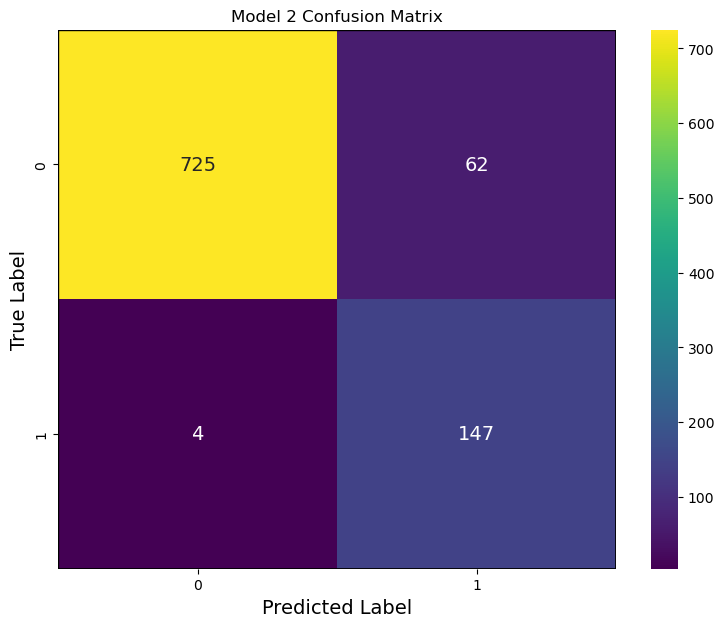

In [26]:
# Visualization a confusion matrix when using the optimal threshold
conf_mat_best = confusion_matrix(y_test, y_pred_best_threshold)
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 2 Confusion Matrix')
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

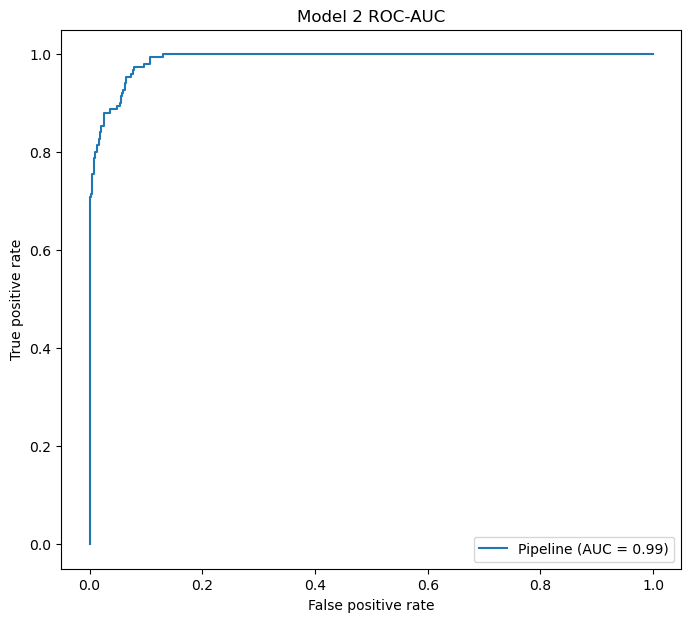

In [27]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (8,7))
plot_roc_curve(model1_lr, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 2 ROC-AUC')
plt.show()

### Model 3

In [28]:
# Creating the model 3 pipeline with PCA and Logistic Regression
model3_pca_lr = Pipeline([('over', RandomOverSampler(sampling_strategy='not majority', random_state = 42)),
                                ('scaler', StandardScaler()),
                                ('pca', PCA(random_state = 42, n_components = 0.95)),
                                ('classifier', LogisticRegression(random_state=42))])

In [29]:
model3_pca_lr.fit(X_train, y_train)

Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='not majority')),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [30]:
y_preds_model_3 = model3_pca_lr.predict(X_test)

In [31]:
model3_recall = recall_score(y_test, y_preds_model_3)
print ("Model 3 Recall Score:", model3_recall)

Model 3 Recall Score: 0.7549668874172185


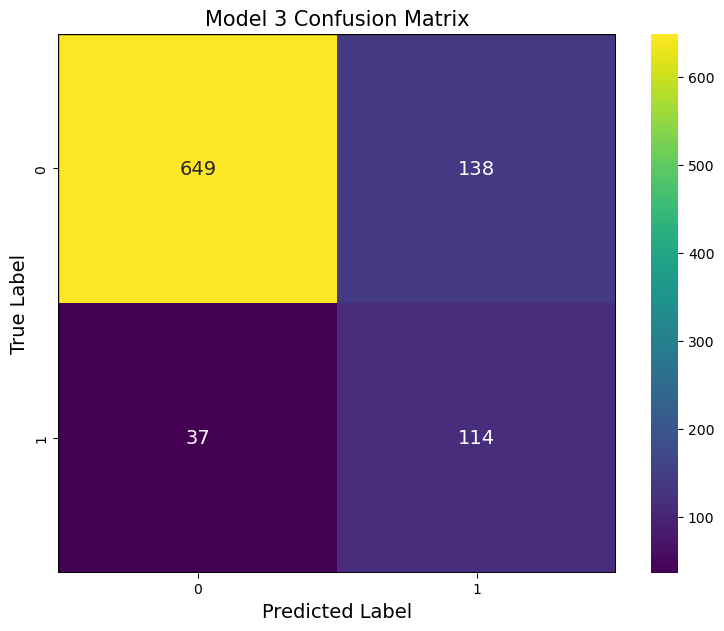

In [32]:
# Visualization of a confusion matrix
conf_mat_best = confusion_matrix(y_test, y_preds_model_3)
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 3 Confusion Matrix', fontdict = {'fontsize': 15})
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

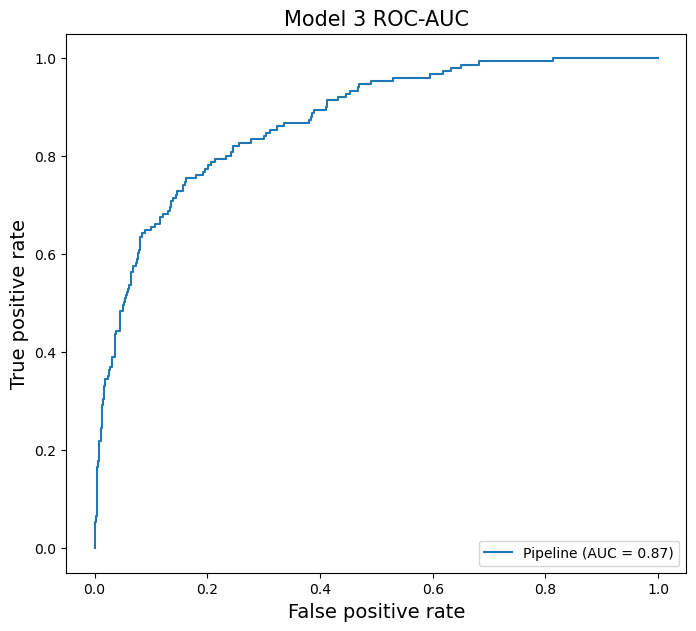

In [33]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (8,7))
plot_roc_curve(model3_pca_lr, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate', size = 14)
ax.set_xlabel('False positive rate', size = 14)
ax.set_title('Model 3 ROC-AUC', fontdict = {'fontsize': 15})
plt.show()

### Model 4

In [34]:
# Creating the model 4 pipeline with Random Forest Classifier
model4_rfc = Pipeline([('over', RandomOverSampler(sampling_strategy='not majority', random_state = 42)), 
                                  ('forest', RandomForestClassifier(random_state = 42))])

In [35]:
# Performing a grid search for the Random Forest Classifier
rf_params = param_grid = {'forest__criterion': ['gini', 'entropy'], 
                          'forest__n_estimators': [50, 150, 200], 
                          'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__max_depth': [3, 5, 7]}

rf_grid_pipeline = GridSearchCV(estimator = model4_rfc, param_grid = rf_params, scoring = 'recall', cv = 5)

In [36]:
# Fitting the grid search on the train data
rf_grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=42,
                                                          sampling_strategy='not '
                                                                            'majority')),
                                       ('forest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'forest__criterion': ['gini', 'entropy'],
                         'forest__max_depth': [3, 5, 7],
                         'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__n_estimators': [50, 150, 200]},
             scoring='recall')

In [37]:
# Looking at the best parameters based on the grid search
rf_grid_pipeline.best_params_

{'forest__criterion': 'gini',
 'forest__max_depth': 5,
 'forest__min_samples_leaf': 2,
 'forest__n_estimators': 50}

In [38]:
# Looking at the best model based on the grid search
model4_rfc = rf_grid_pipeline.best_estimator_

In [39]:
# Fitting model 4 on the train data
model4_rfc.fit(X_train, y_train)

Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='not majority')),
                ('forest',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        n_estimators=50, random_state=42))])

In [40]:
# Calculating the predictions for the test data
y_preds_model_4 = model4_rfc.predict(X_test)

In [41]:
# Calculating the recall score for model 4
model4_recall = recall_score(y_test, y_preds_model_4)

print('Model 4 Recall Score:', model4_recall)

Model 4 Recall Score: 1.0


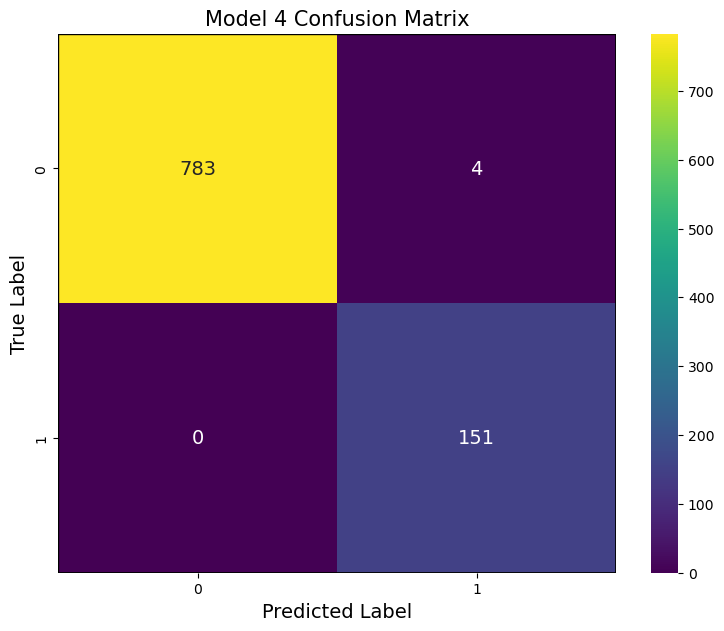

In [42]:
# Visualization of a confusion matrix
conf_mat_best = confusion_matrix(y_test, y_preds_model_4)
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 4 Confusion Matrix', fontdict = {'fontsize': 15})
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

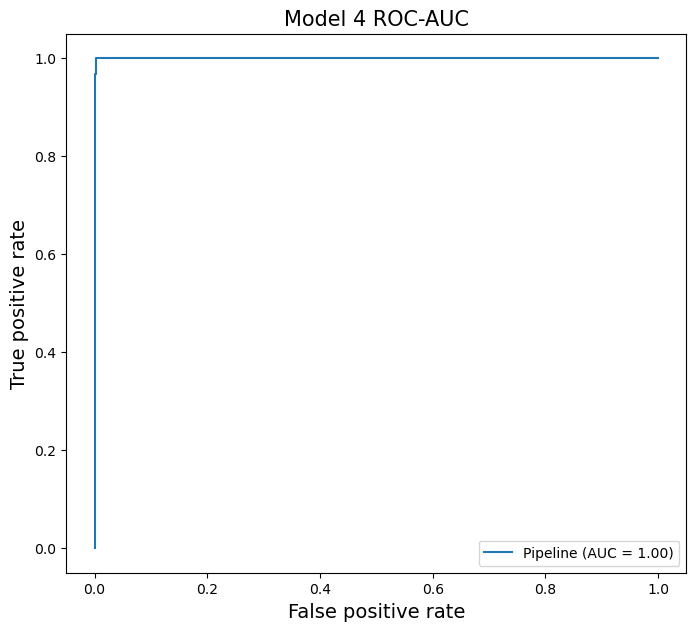

In [43]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (8,7))
plot_roc_curve(model4_rfc, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate', size = 14)
ax.set_xlabel('False positive rate', size = 14)
ax.set_title('Model 4 ROC-AUC', fontdict = {'fontsize': 15})
plt.show()

In [44]:
# Looking at whihc features are most important
feature_scores = pd.Series(model4_rfc.steps[1][1].feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Minimum Orbit Intersection      0.258791
Est Dia in Miles(max)           0.128796
Est Dia in M(max)               0.098480
Est Dia in KM(max)              0.090888
Absolute Magnitude              0.082752
Perihelion Distance             0.060099
Est Dia in Miles(min)           0.057683
Est Dia in Feet(min)            0.031308
Est Dia in M(min)               0.028110
Est Dia in Feet(max)            0.022972
Orbit ID                        0.021499
Est Dia in KM(min)              0.017071
Inclination                     0.014224
Miss Dist.(miles)               0.007725
Relative Velocity km per hr     0.007093
Name                            0.007008
Neo Reference ID                0.006466
Orbit Uncertainity              0.006419
Miss Dist.(lunar)               0.006229
Eccentricity                    0.005569
Miles per hour                  0.005509
Orbital Period                  0.004628
Jupiter Tisserand Invariant     0.004112
Miss Dist.(Astronomical)        0.004099
Perihelion Arg  

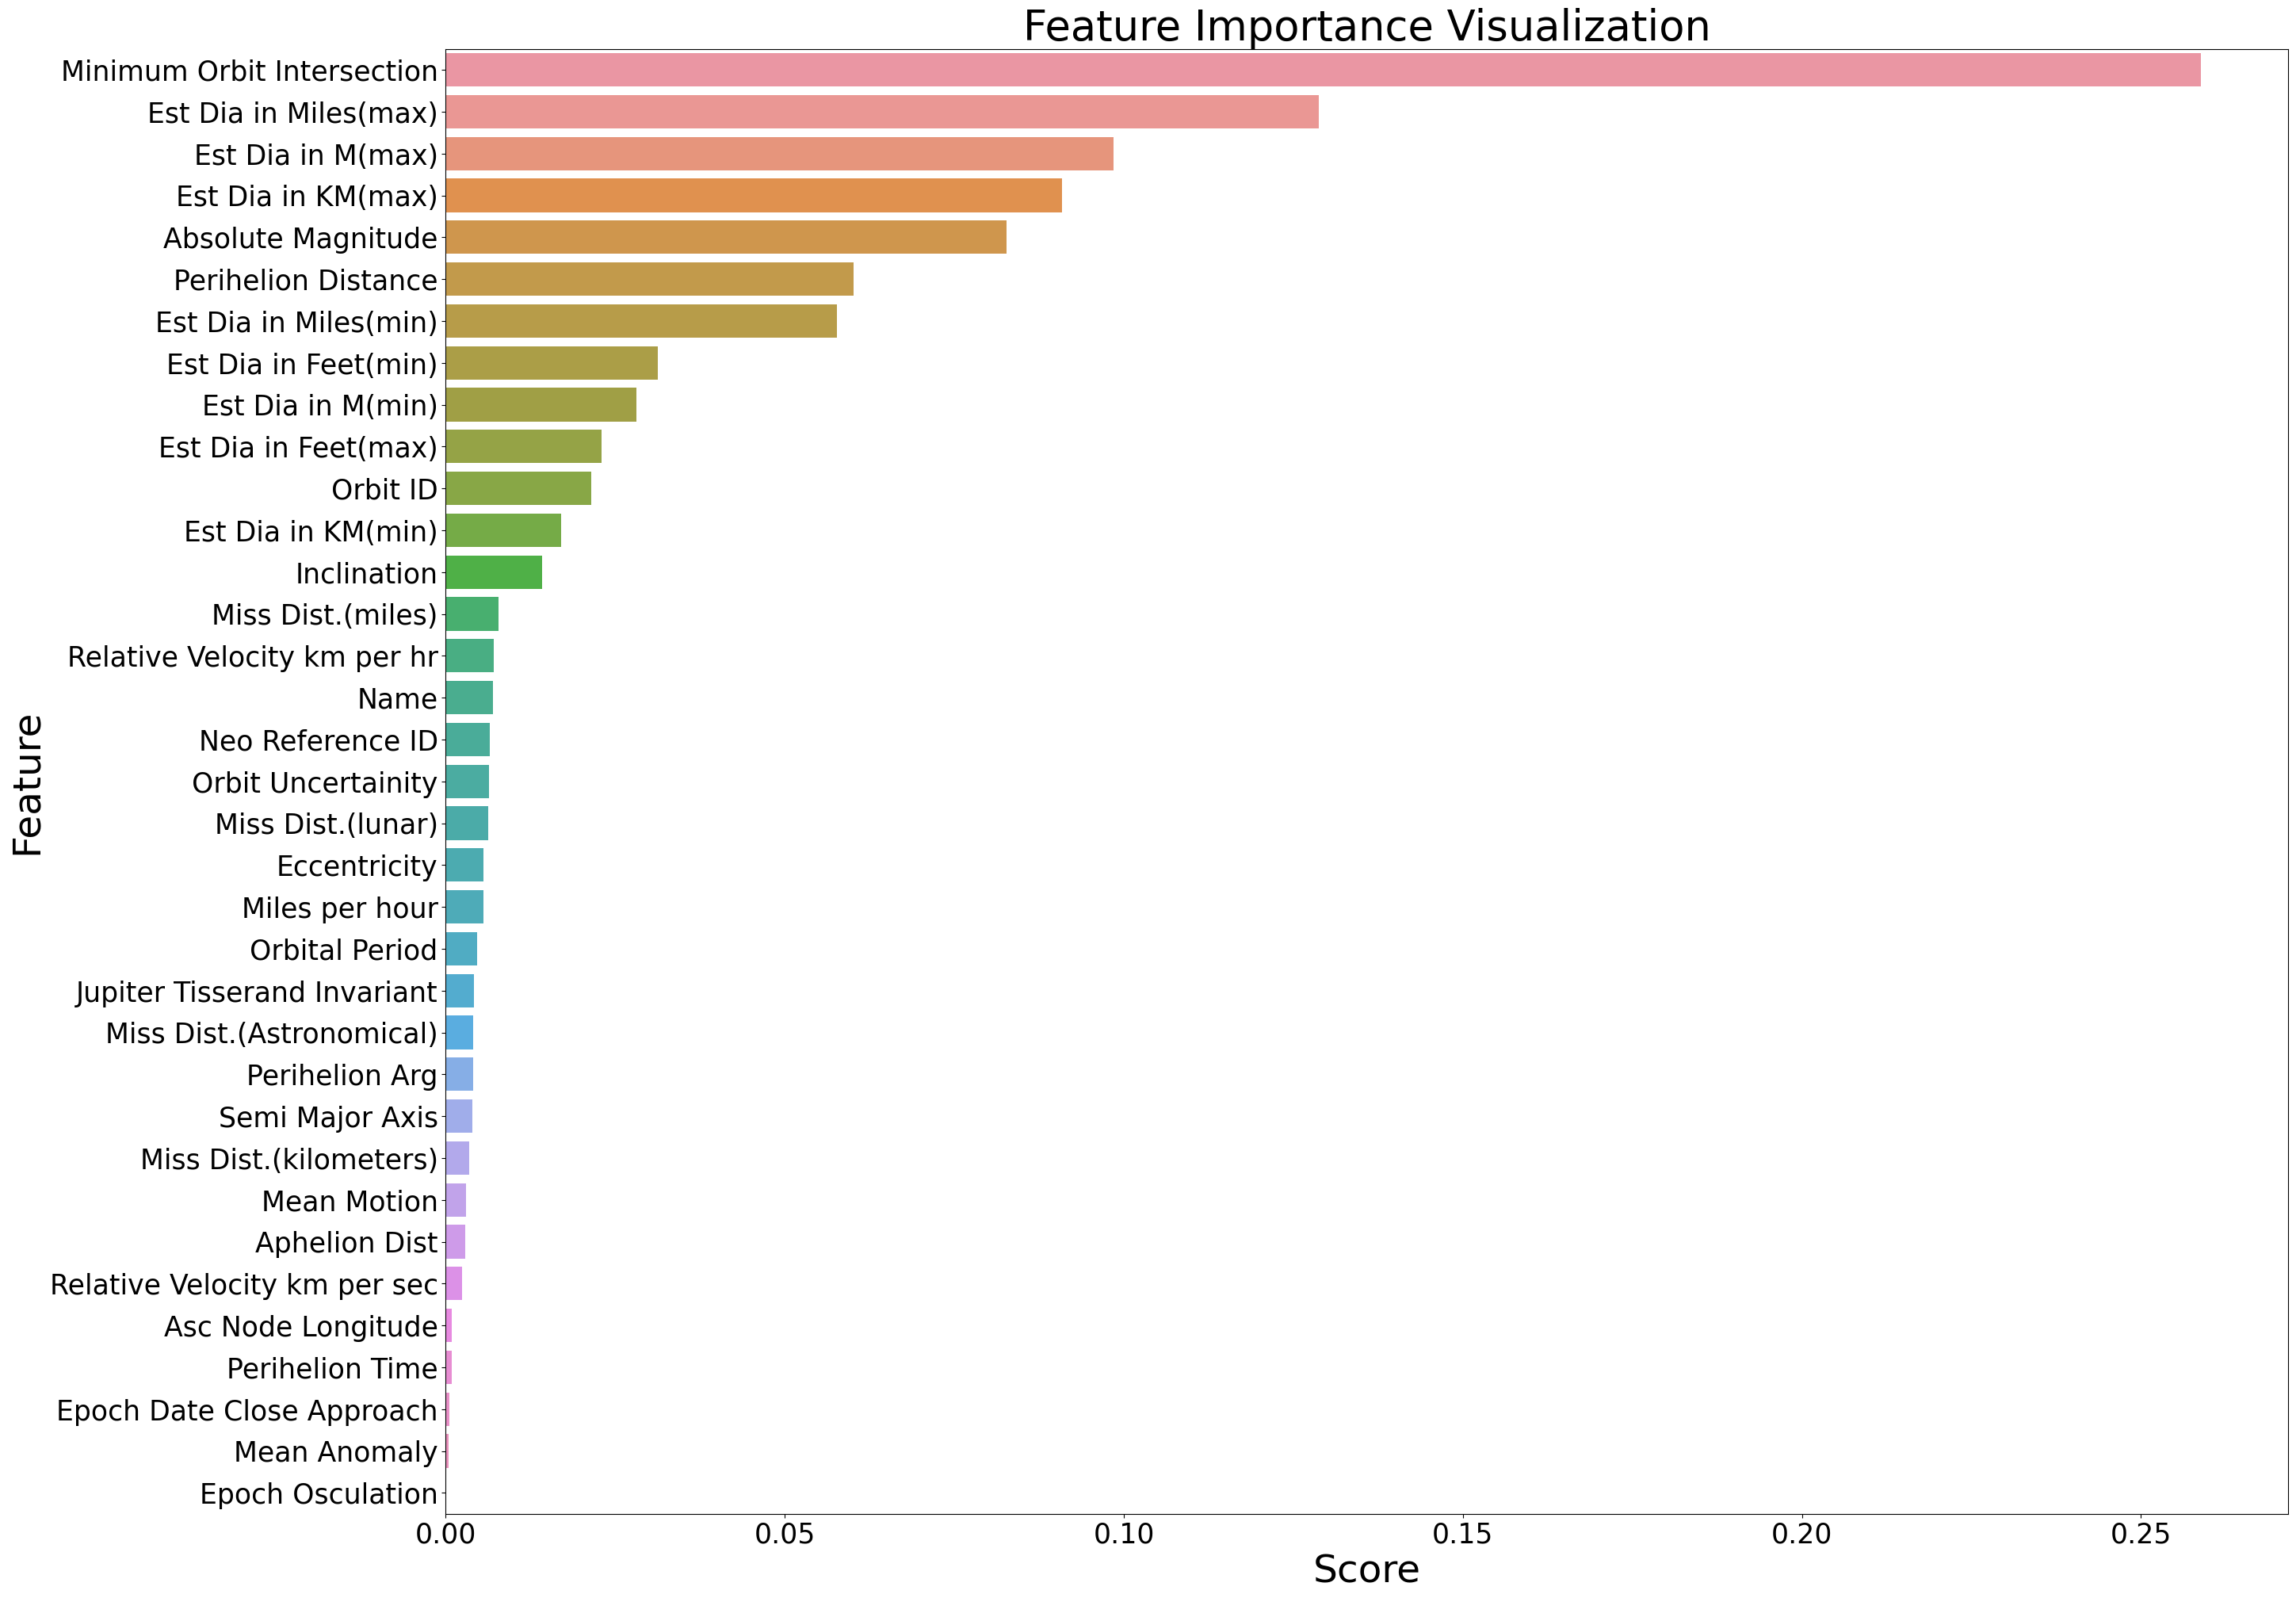

In [73]:
# Visualizing the feature importances
fig, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores.values, y=feature_scores.index)
ax.set_title("Feature Importance Visualization", fontdict = {'fontsize': 38})
ax.set_yticklabels(feature_scores.index, size = 25)
plt.xticks(fontsize=25)
ax.set_xlabel("Score", size = 35)
ax.set_ylabel("Feature", size = 35)
plt.show()

### Model 5

In [46]:
# Dropping all predictor variables other than the top 10 most important
columns_to_drop = feature_scores.index[10:]

X_train_reduced = X_train.copy()
X_train_reduced = X_train_reduced.drop(columns = columns_to_drop, axis = 1)

X_test_reduced = X_test.copy()
X_test_reduced = X_test_reduced.drop(columns = columns_to_drop, axis = 1)

In [47]:
# Listing the columns that were dropped
columns_to_drop

Index(['Orbit ID', 'Est Dia in KM(min)', 'Inclination', 'Miss Dist.(miles)',
       'Relative Velocity km per hr', 'Name', 'Neo Reference ID',
       'Orbit Uncertainity', 'Miss Dist.(lunar)', 'Eccentricity',
       'Miles per hour', 'Orbital Period', 'Jupiter Tisserand Invariant',
       'Miss Dist.(Astronomical)', 'Perihelion Arg', 'Semi Major Axis',
       'Miss Dist.(kilometers)', 'Mean Motion', 'Aphelion Dist',
       'Relative Velocity km per sec', 'Asc Node Longitude', 'Perihelion Time',
       'Epoch Date Close Approach', 'Mean Anomaly', 'Epoch Osculation'],
      dtype='object')

In [48]:
# Listing the columns that remain in the dataframe
X_train_reduced.columns

Index(['Absolute Magnitude', 'Est Dia in KM(max)', 'Est Dia in M(min)',
       'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Minimum Orbit Intersection', 'Perihelion Distance'],
      dtype='object')

In [49]:
# Creating the model 5 pipeline with Random Forest Classifier
model5_rfc_reduced = Pipeline([('over', RandomOverSampler(sampling_strategy='not majority', random_state = 42)), 
                                  ('forest', RandomForestClassifier(random_state = 42))])

In [50]:
# Performing a grid search for the Random Forest Classifier
rf_params_reduced = param_grid = {'forest__criterion': ['gini', 'entropy'], 
                          'forest__n_estimators': [50, 150, 200], 
                          'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__max_depth': [3, 5, 7]}

rf_reduced_grid_pipeline = GridSearchCV(estimator = model5_rfc_reduced, 
                                        param_grid = rf_params_reduced, scoring = 'recall', cv = 5)

In [51]:
# Fitting the grid search on the train data
rf_reduced_grid_pipeline.fit(X_train_reduced, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=42,
                                                          sampling_strategy='not '
                                                                            'majority')),
                                       ('forest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'forest__criterion': ['gini', 'entropy'],
                         'forest__max_depth': [3, 5, 7],
                         'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__n_estimators': [50, 150, 200]},
             scoring='recall')

In [52]:
# Looking at the best parameters based on the grid search
rf_reduced_grid_pipeline.best_params_

{'forest__criterion': 'gini',
 'forest__max_depth': 7,
 'forest__min_samples_leaf': 2,
 'forest__n_estimators': 50}

In [53]:
# Looking at the best model based on the grid search
model5_rfc_reduced = rf_reduced_grid_pipeline.best_estimator_

In [54]:
# Fitting model 5 on the train data
model5_rfc_reduced.fit(X_train_reduced, y_train)

Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='not majority')),
                ('forest',
                 RandomForestClassifier(max_depth=7, min_samples_leaf=2,
                                        n_estimators=50, random_state=42))])

In [55]:
# Calculating the predictions for the test data
y_preds_model_5 = model5_rfc_reduced.predict(X_test_reduced)

In [56]:
# Calculating recall score for model 5
model5_recall = recall_score(y_test, y_preds_model_5)

print('Model 5 Recall Score:', model5_recall)

Model 5 Recall Score: 1.0


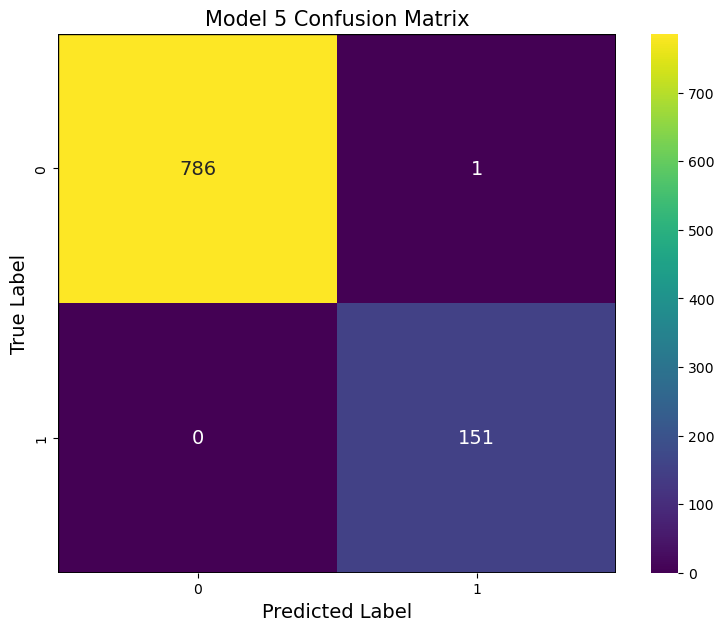

In [57]:
# Visualization of a confusion matrix
conf_mat_best = confusion_matrix(y_test, y_preds_model_5)
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 5 Confusion Matrix', fontdict = {'fontsize': 15})
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

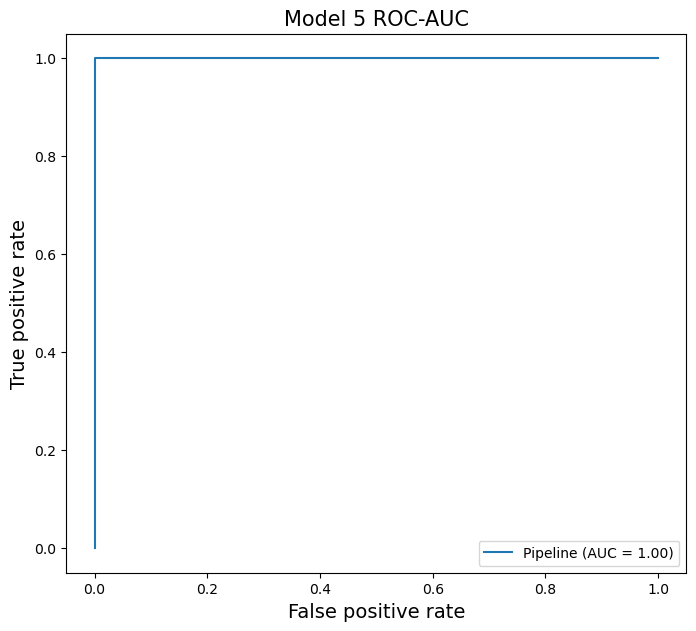

In [58]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (8,7))
plot_roc_curve(model5_rfc_reduced, X_test_reduced, y_test, ax = ax)
ax.set_ylabel('True positive rate', size = 14)
ax.set_xlabel('False positive rate', size = 14)
ax.set_title('Model 5 ROC-AUC', fontdict = {'fontsize': 15})
plt.show()

### Model 6

In [59]:
# Dropping more predictor variables that seem redundant
columns_to_drop_2 = ['Est Dia in KM(max)', 'Est Dia in M(max)',
                   'Est Dia in M(min)', 'Est Dia in Feet(max)', 'Est Dia in Feet(min)']

X_train_reduced = X_train_reduced.drop(columns = columns_to_drop_2, axis = 1)

X_test_reduced = X_test_reduced.drop(columns = columns_to_drop_2, axis = 1)

In [60]:
# Previewing the updated dataframe
X_train_reduced

,Absolute Magnitude,Est Dia in Miles(min),Est Dia in Miles(max),Minimum Orbit Intersection,Perihelion Distance
884,18.7,0.300543,0.672034,0.134390,1.136908
2011,23.8,0.028702,0.064179,0.187247,1.196637
3550,25.0,0.016516,0.036931,0.025758,0.721266
522,26.6,0.007905,0.017676,0.007522,0.771946
3819,26.5,0.008278,0.018509,0.011573,0.849893
...,...,...,...,...,...
3758,21.6,0.079051,0.176763,0.104712,0.450272
3954,23.6,0.031471,0.070371,0.095708,0.861260
2360,21.8,0.072095,0.161210,0.213406,1.191130
2547,22.4,0.054690,0.122290,0.047490,0.495538


In [61]:
# Creating the model 6 pipeline with Random Forest Classifier
model6_rfc_reduced = Pipeline([('over', RandomOverSampler(sampling_strategy='not majority', random_state = 42)), 
                                  ('forest', RandomForestClassifier(random_state = 42))])

In [62]:
# Performing a grid search for the Random Forest Classifier
rf_params_reduced_2 = param_grid = {'forest__criterion': ['gini', 'entropy'], 
                          'forest__n_estimators': [50, 150, 200], 
                          'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__max_depth': [3, 5, 7]}

rf_reduced_grid_pipeline_2 = GridSearchCV(estimator = model6_rfc_reduced, 
                                        param_grid = rf_params_reduced_2, scoring = 'recall', cv = 5)

In [63]:
# Fitting the grid search on the train data
rf_reduced_grid_pipeline_2.fit(X_train_reduced, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=42,
                                                          sampling_strategy='not '
                                                                            'majority')),
                                       ('forest',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'forest__criterion': ['gini', 'entropy'],
                         'forest__max_depth': [3, 5, 7],
                         'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__n_estimators': [50, 150, 200]},
             scoring='recall')

In [64]:
# Looking at the best parameters based on the grid search
rf_reduced_grid_pipeline_2.best_params_

{'forest__criterion': 'gini',
 'forest__max_depth': 5,
 'forest__min_samples_leaf': 2,
 'forest__n_estimators': 50}

In [65]:
# Looking at the best model based on the grid search
model6_rfc_reduced = rf_reduced_grid_pipeline_2.best_estimator_

In [66]:
# Fitting model 5 on the train data
model6_rfc_reduced.fit(X_train_reduced, y_train)

Pipeline(steps=[('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='not majority')),
                ('forest',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        n_estimators=50, random_state=42))])

In [67]:
# Calculating the predictions for the test data
y_preds_model_6 = model6_rfc_reduced.predict(X_test_reduced)

In [68]:
# Calculating recall score for model 6
model6_recall = recall_score(y_test, y_preds_model_6)

print('Model 6 Recall Score:', model6_recall)

Model 6 Recall Score: 1.0


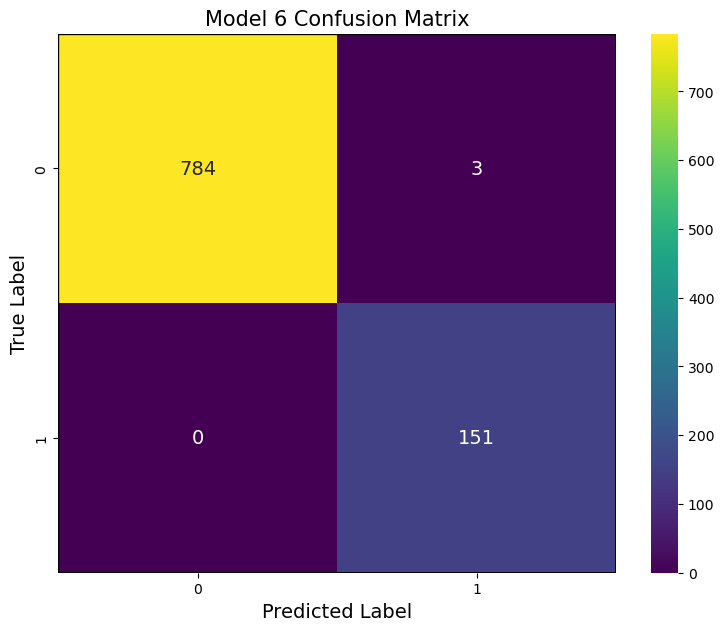

In [69]:
# Visualization of a confusion matrix
conf_mat_best = confusion_matrix(y_test, y_preds_model_6)
fig, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(conf_mat_best, annot = True, fmt='g', annot_kws={'fontsize': 14}, 
            cmap = 'viridis', linecolor = 'black', ax = ax)
ax.set_ylabel('True Label', size = 14)
ax.set_xlabel('Predicted Label', size = 14)
ax.set_title('Model 6 Confusion Matrix', fontdict = {'fontsize': 15})
ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = conf_mat_best.shape[1], color = 'k',
            linewidth = 2)
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
ax.axvline(x = conf_mat_best.shape[0], 
            color = 'k', linewidth = 2)
plt.show()

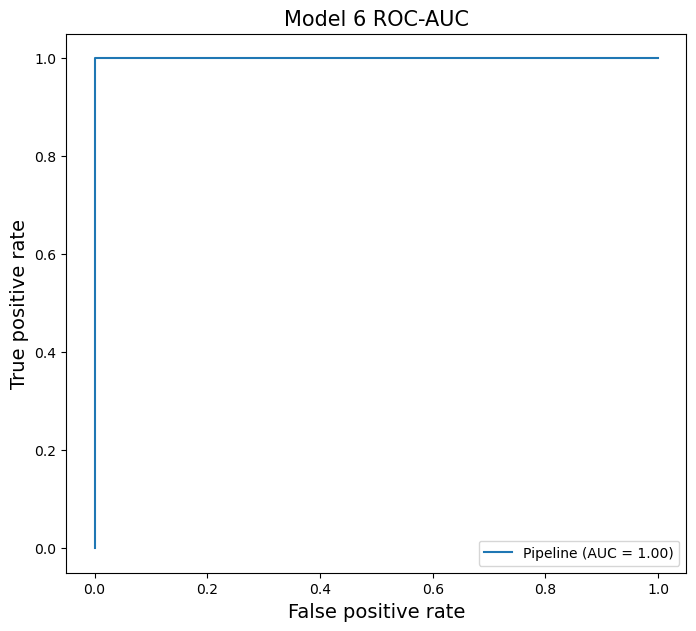

In [70]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (8,7))
plot_roc_curve(model6_rfc_reduced, X_test_reduced, y_test, ax = ax)
ax.set_ylabel('True positive rate', size = 14)
ax.set_xlabel('False positive rate', size = 14)
ax.set_title('Model 6 ROC-AUC', fontdict = {'fontsize': 15})
plt.show()

## Evaluation

Despite Model 5 showing a better confusion matrix (0 false negatives and 1 false positive), I am choosing Model 6 as my final model (0 false negatives and 3 false positives). I am doing so because both models have the same recall score (1.00), but Model 6 is more simple (i.e., fewer predictor variables). Moreover, I am willing to risk a difference of two more false positives to achieve the most straightforward model.

## Preparing for Deployment

In [74]:
with open("model6.pkl", "wb") as f:
    pickle.dump(model6_rfc_reduced, f)

## Deployed Model

https://jordanate-hazardous-asteroid-prediction-model-zab2dk.streamlit.app/